In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys

In [2]:
img = cv.imread(cv.samples.findFile("resources/comVis.png"))
if img is None:
    sys.exit("Could not find image.")

In [3]:
cv.imshow("Output", img)
cv.waitKey(0)

-1

In [4]:
height, width, channels = img.shape
print("Dimensions of image are \nHeight:", height, "\nWidth:", width, "\nNo. of Channels:", channels)

Dimensions of image are 
Height: 501 
Width: 500 
No. of Channels: 3


In [5]:
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.dtype)

uint8


In [7]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]]


In [9]:
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("grayscale", imgGray)
cv.waitKey(0)

-1

In [11]:
imgBlur = cv.GaussianBlur(imgGray, (7, 7), 1)
cv.imshow("Blur", imgBlur)
cv.waitKey(0)

-1

In [62]:
imgCanny = cv.Canny(imgBlur, 50, 50)
cv.imshow("Canny", imgCanny)
cv.waitKey(0)

-1

In [61]:
imgResize = cv.resize(img, (300, 300))
cv.imshow("resized image", imgResize)
cv.waitKey(0)

-1

In [63]:
width = 200
height = 200
pts1 = np.float32([[200, 150], [400, 150], [200, 350], [400, 350]])
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
ImgOutPut = cv.warpPerspective(img, matrix, (width, height))
cv.imshow("img", img)
cv.imshow("output", ImgOutPut)
cv.waitKey(0)

-1

In [65]:
flippedImg = cv.flip(img, -1)
cv.imshow("flipped image", flippedImg)
cv.waitKey(0)

-1

In [14]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

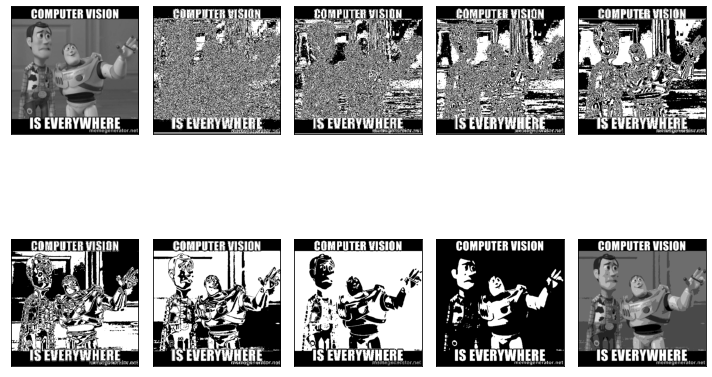

In [16]:
reconstructed_image = extract_bit_plane(imgGray)

In [18]:
# New dummy image that will contain the adjustments
adjusted_image = np.zeros(img.shape, img.dtype)

In [52]:
# Defining alpha and beta:
alpha = 3.0
beta = 100
# alpha1 = 3   # Contrast Control [1.0-3.0]
# alpha2 = 3
# alpha3 = 3
# alpha4 = 1
# alpha5 = 1
# alpha6 = 1
# beta1 = 100    # Brightness Control [0-100]
# beta2 = 0
# beta3 = -100
# beta4 = 100
# beta5 = 0
# beta6 = -100

In [53]:
# Scaling and converting the image contrast and brightness
adjusted_image = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
# adjusted_image1 = cv.convertScaleAbs(img, alpha=alpha1, beta=beta1)
# adjusted_image2 = cv.convertScaleAbs(img, alpha=alpha2, beta=beta2)
# adjusted_image3 = cv.convertScaleAbs(img, alpha=alpha3, beta=beta3)
# adjusted_image4 = cv.convertScaleAbs(img, alpha=alpha4, beta=beta4)
# adjusted_image5 = cv.convertScaleAbs(img, alpha=alpha5, beta=beta5)
# adjusted_image6 = cv.convertScaleAbs(img, alpha=alpha6, beta=beta6)

In [55]:
# Displaying Adjusted image
cv.imshow('Resulting Image', adjusted_image)
cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image1)
# cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image2)
# cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image3)
# cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image4)
# cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image5)
# cv.waitKey(0)
# cv.imshow('Resulting Image', adjusted_image6)
# cv.waitKey(0)

-1

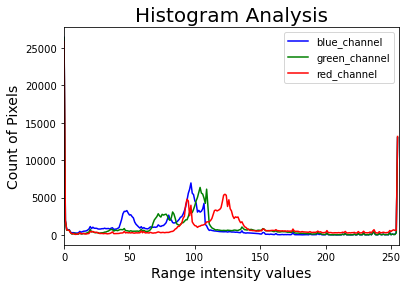

In [56]:
# setting RGB color list:
color = ('blue', 'green', 'red')

# Iterating throuhg each channel and plotting the corresponding result:
# using cv.calcHist() opencv method
for i,color in enumerate(color):
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    plt.plot(histogram, color=color, label=color+'_channel')
    # plt.plot(cdf_percent, color=color, label=color+'_cdf')
    plt.xlim([0,256])

plt.title('Histogram Analysis',fontsize=20)
plt.xlabel('Range intensity values',fontsize=14)
plt.ylabel('Count of Pixels',fontsize=14)
plt.legend()
plt.show()

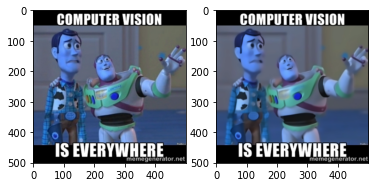

In [60]:
# denoising of image saving it into dst image
dst = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
  
# Plotting of source and destination image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()